Load in the digits data with
    `digits = datasets.load_digits()`

Remember that each sklearn data set comes with a target object (the response) and a data object (the explanatory variables). 

These data concern handwriting recognition so the response is a digit (0 to 9) and the explanatory variables are levels of grey on an 8 by 8 grid. 

You can get a plot of any row with:
    `import matplotlib.pyplot as plt
    choose_row = 100
    plt.gray() 
    plt.matshow(digits.images[choose_row]) 
    plt.title(digits.target[choose_row])`


Where here I've made the title the digit it's supposed to represent. You can compare digits.images with `digits.data[choose_row,:]` and see that the 8 by 8 pixel grid has just been re-arranged into a single row. 

Try changing the value of choose_row to see different digits and how they've been drawn. 

Note that this data set has an extra object 'images' that contains the 8 by 8 matrices containing the pixel intensities. 

Using the digits.images object, create a plot of the average pixel intensity across the entire data set. 

**Which pixel is used most (i.e. is the lightest colour)
Hint: use np.sum with a suitable axis argument to find the average image values
Write the row number and the column number separated by a space.**

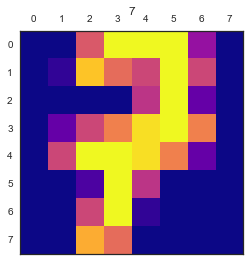

In [12]:
%matplotlib inline
# plt.rcParams['figure.figsize'] = (18, 8)
# Start by importing a data set
from sklearn import datasets
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.axes_style('white')
sns.set_style('white')

digits = datasets.load_digits()

choose_row = 44
_ = plt.plasma() 
__ = plt.matshow(digits.images[choose_row]) 
___ = plt.title(digits.target[choose_row])

### Get average intensity in each pixel and plot it.
### Return the array of average intensities
### Print out the row and column index of highest intensity

Plot done - returning array of average intensities


Index of max average intensity is: 
R: 7
C: 3


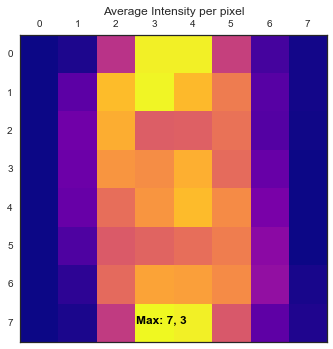

In [2]:
# Get average intensity in each pixel and plot it.
# Return the array of average intensities
# Print out the row and column index of highest intensity
def plotAveIntesities(images):
    sumarray=np.sum(digits.images, axis=0)/len(digits.images)
    plt.plasma() 
    plt.matshow(sumarray) 
    plt.title('Average Intensity per pixel')
    maxInt = np.unravel_index(sumarray.argmax(), sumarray.shape)
    x=maxInt[1]
    y=maxInt[0]
    _=plt.annotate(# Assign last plotting statement to variable to stop output being plotted
        s='Max: %d, %d'% maxInt,
        xy=(x,y),
        ha='center',va='center',
        xytext=maxInt,
        textcoords='offset points',
        color='black',
        weight='bold'
    )
    
    print("Plot done - returning array of average intensities")
    print("\n\nIndex of max average intensity is: \nR: %d\nC: %d" 
        % maxInt)
    
    return {"Average":sumarray,"MaxLoc":maxInt}

# Run the function which will plot the average intensities and return dict with
# computed average intensities and location of max intensity
aveInt = plotAveIntesities(digits.images)

### Create training, validation and test sets via the following code:

In [3]:
# Split into train and test data sets
n_samples = len(digits.target)
train_set = range(0,int(0.5*n_samples))
val_set = range(int(0.5*n_samples),int(0.75*n_samples))
test_set = range(int(0.75*n_samples),n_samples)
X_train = DataFrame(digits.data[train_set])
y_train = Series(digits.target[train_set])
X_val = DataFrame(digits.data[val_set])
y_val = Series(digits.target[val_set])
X_test = DataFrame(digits.data[test_set])
y_test = Series(digits.target[test_set])


### Which is the most common digit in the training set?

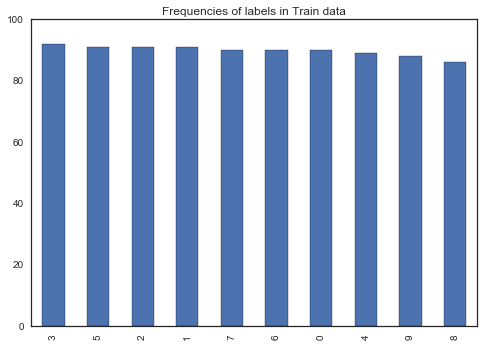

In [4]:
# Find most common digit in train set
y_train.value_counts().plot(kind='bar')
plt.title('Frequencies of labels in Train data')

Use the following code to import the SVM, kNN and RF classifiers
    
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
Run the three classifiers on the training set with their default parameter values. 

Each fitted object will then have an attribute score which gives the accuracy of the classifier 

(i.e. 1 - misclassification rate). 

**Which has the highest score on the test data?**
(write knn, rf or svm)

In [5]:
# Import classifiers
# Run the three classifiers on the training set with their default parameter 
# values. Each fitted object will then have an attribute score which gives the 
# accuracy of the classifier (i.e. 1 - misclassification rate). Which has the 
# highest score on the test data?
# (write knn, rf or svm)
from sklearn import *
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LinearSVC()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()
# get accuracy
print("Accuracy of Linear Support Vector Machine classifier on test data %.2f" % clf1.fit(X_train,y_train).score(X_test,y_test))
print("Accuracy of K Nearest Neighbours on test data %.2f" % clf2.fit(X_train,y_train).score(X_test,y_test))
print("Accuracy of Random forest classifier on test data %.2f" % clf3.fit(X_train,y_train).score(X_test,y_test))

Accuracy of Linear Support Vector Machine classifier on test data 0.89
Accuracy of K Nearest Neighbours on test data 0.95
Accuracy of Random forest classifier on test data 0.85


/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/martinoleary/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnal

Each of the above models has key parameters which we might like to estimate. 

For example, we might want to estimate the 'best' number of neighbours to use in kNN. 

To do this, we fit kNN with differing values of k to the training set and compare performance on the validation test. Some code to do this is below:

    kvals = range(1,11)
    knn_scores = [KNeighborsClassifier(n_neighbors=kval).fit(X_train,y_train).score(X_val,y_val) for kval in kvals]

You should see that the best score is when k=1 and acheives <kbd>96.9%</kbd> accuracy. 

Repeat the above code but for the RF and SVM models. 

For the RF model change the <kbd>n_estimators</kbd> parameter on the grid <kbd>5, 10, ... 30</kbd>. 

For the SVM model change the <kbd>C parameter</kbd> on the values <kbd>0.001, 0.01, 0.1, 1, 10 100</kbd>. 

Write the best value of n_estimators and C separated by a space. If you get two values with the same score write the smallest.
 
(Hint: use random_state=123 as an extra argument to your RF classifier to get repeatable results).

Accuracies per parameter:
1     0.968820
2     0.966592
3     0.964365
4     0.951002
5     0.957684
6     0.955457
7     0.953229
8     0.951002
9     0.951002
10    0.957684
dtype: float64
Best K value is 1 


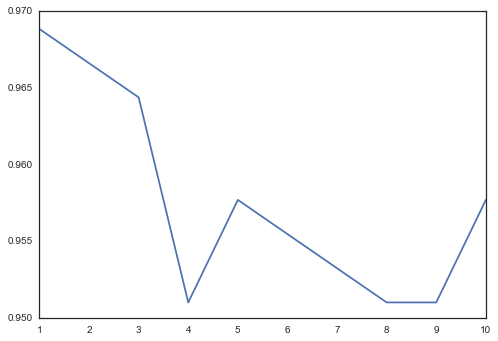

In [6]:
# Now that KNN is found to be the best out of the box classifier let's imporve
# it by tweaking the model paramter K
kvals = range(1,11)
knn_scores = pd.Series([KNeighborsClassifier(n_neighbors=kval)
                        .fit(X_train,y_train)
                        .score(X_val,y_val) for kval in kvals],index=kvals)
print "Accuracies per parameter:\n",knn_scores
print "Best K value is %d " % knn_scores.index[knn_scores.values.argmax()]
knn_scores.plot()

### For the n vals in Random Forrest

Accuracies per parameter:
5     0.839644
10    0.899777
15    0.913140
20    0.944321
25    0.946548
30    0.946548
dtype: float64
Best N_estimatores value is 25 


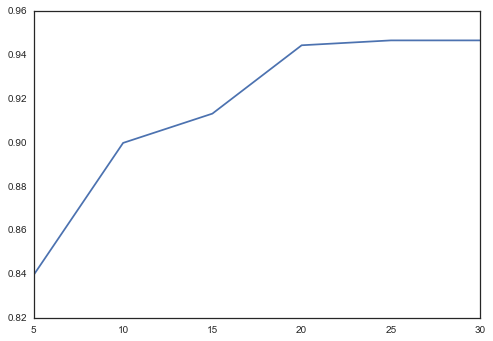

In [7]:
n_vals = range(5,35,5)
RF_scores = pd.Series([RandomForestClassifier(n_estimators=nval,random_state=123)
                       .fit(X_train,y_train)
                       .score(X_val,y_val) for nval in n_vals],index=n_vals)
print "Accuracies per parameter:\n",RF_scores
print "Best N_estimatores value is %d " % RF_scores.index[RF_scores.values.argmax()]
RF_scores.plot()

### For the C vals in Linear SVM

Accuracies per parameter:
0.001      0.953229
0.010      0.942094
0.100      0.928731
1.000      0.924276
10.000     0.928731
100.000    0.928731
dtype: float64
Best C value is 0.001 


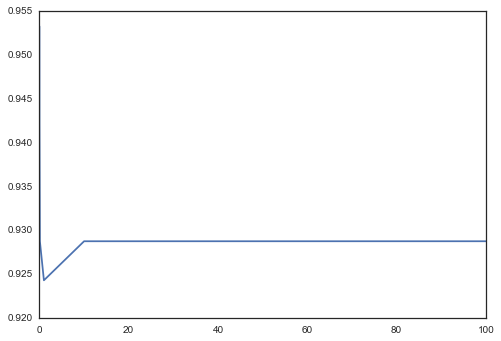

In [8]:
c_vals = np.array([0.001,0.01,0.1,1,10,100])
LSVM_scores = pd.Series([LinearSVC(C=cval)
                         .fit(X_train,y_train)
                         .score(X_val,y_val) for cval in c_vals],index=c_vals)
print "Accuracies per parameter:\n",LSVM_scores
print "Best C value is %.3f " % LSVM_scores.index[LSVM_scores.values.argmax()]
LSVM_scores.plot()

### Use your best knn, rf and svm models to predict for the test data set. Which model performs best? (write knn, rf, or svm)

In [9]:
clf1 = LinearSVC(C=LSVM_scores.index[LSVM_scores.values.argmax()])
clf2 = KNeighborsClassifier(n_neighbors=knn_scores.index[knn_scores.values.argmax()])
clf3 = RandomForestClassifier(n_estimators=RF_scores.index[RF_scores.values.argmax()])
# get accuracy
print("Accuracy of Linear Support Vector Machine classifier on test data %.2f" % clf1.fit(X_train,y_train).score(X_test,y_test))
print("Accuracy of K Nearest Neighbours on test data %.2f" % clf2.fit(X_train,y_train).score(X_test,y_test))
print("Accuracy of Random forest classifier on test data %.2f" % clf3.fit(X_train,y_train).score(X_test,y_test))

Accuracy of Linear Support Vector Machine classifier on test data 0.91
Accuracy of K Nearest Neighbours on test data 0.95
Accuracy of Random forest classifier on test data 0.91
